In [21]:
import pandas as pd

train_data = pd.read_csv('train.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12156\1663654670.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


In [22]:
print(len(train_data))

33538


In [23]:
train_data.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

<Axes: >

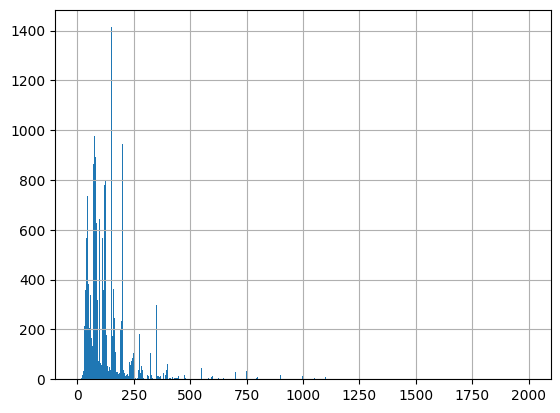

In [24]:
train_data['price'].hist(bins = 1000)

In [25]:
train_data = train_data.drop(train_data[(train_data['accommodates']<3) &
                                        (train_data['price']>1600)].index)

train_data = train_data.drop(train_data[(train_data['beds']>13) &
                                        (train_data['price']<1200)].index)

train_data = train_data.drop(train_data[(train_data['bedrooms']>7.5) &
                                        (train_data['price']<1200)].index)

train_data = train_data.drop(train_data[(train_data['square_feet']>2200) &
                                        (train_data['price']<1000)].index)

train_data = train_data.drop(train_data[(train_data['guests_included']>12) &
                                        (train_data['price']<1000)].index)

train_data = train_data.drop(train_data[(train_data['bathrooms']>10) &
                                        (train_data['price']<1000)].index)

train_data = train_data.drop(train_data[(train_data['review_scores_location']<3) &
                                        (train_data['price']>300)].index)

train_data = train_data.drop(train_data[(train_data['calculated_host_listings_count']>100) &
                                        (train_data['price']>1000)].index)
train_data = train_data.drop(train_data[(train_data['review_scores_cleanliness']<9) &
                                        (train_data['price']>1500)].index)
train_data = train_data.drop(train_data[(train_data['review_scores_rating']<40) &
                                        (train_data['price']>500)].index)
train_data = train_data.drop(train_data[(train_data['number_of_reviews']>3500) &
                                        (train_data['price']>300)].index)
train_data = train_data.drop(train_data[(train_data['review_scores_value']<2.5) &
                                        (train_data['price']>500)].index)
train_data = train_data.drop(train_data[(train_data['minimum_nights']>700) &
                                        (train_data['price']>100)].index)

In [26]:
cols1 = ["host_response_time","host_location","market","city","state","host_is_superhost","host_has_profile_pic","host_identity_verified"]
for col in cols1:
    train_data[col].fillna("None", inplace=True)

In [27]:
cols = ["review_scores_value","review_scores_checkin","review_scores_location","review_scores_accuracy","review_scores_communication","review_scores_cleanliness","review_scores_rating","reviews_per_month","zipcode","bathrooms","bedrooms","bedrooms","beds","host_listings_count"]
for col in cols:
    train_data[col].fillna(0, inplace=True)

train_data['price'] = train_data['price'].fillna(train_data['price'].mean())
train_data['host_response_rate'] = train_data['host_response_rate'].str.strip('%').astype(float)

median_response_rate = train_data['host_response_rate'].median()
train_data['host_response_rate'].fillna(median_response_rate, inplace=True)
train_data['host_response_rate'] = train_data['host_response_rate'].astype(str) + '%'
train_data['host_response_rate']

0        100.0%
1        100.0%
2        100.0%
3        100.0%
4        100.0%
          ...  
33533    100.0%
33534    100.0%
33535    100.0%
33536    100.0%
33537     92.0%
Name: host_response_rate, Length: 33499, dtype: object

In [28]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

categories1 = [x for x in list(set(train_data['neighbourhood_group_cleansed'])) if type(x) is str]
categories3 = [x for x in list(set(train_data['host_response_time'])) if type(x) is str]
categories4 = [x for x in list(set(train_data['host_response_rate'])) if type(x) is str]
categories5 = [x for x in list(set(train_data['host_is_superhost'])) if type(x) is str]
categories6 = [x for x in list(set(train_data['host_has_profile_pic'])) if type(x) is str]
categories7 = [x for x in list(set(train_data['host_identity_verified'])) if type(x) is str]
categories8 = [x for x in list(set(train_data['property_type'])) if type(x) is str]
categories9 = [x for x in list(set(train_data['room_type'])) if type(x) is str]
categories10 = [x for x in list(set(train_data['bed_type'])) if type(x) is str]
categories11 = [x for x in list(set(train_data['instant_bookable'])) if type(x) is str]
categories12 = [x for x in list(set(train_data['is_business_travel_ready'])) if type(x) is str]
categories13 = [x for x in list(set(train_data['cancellation_policy'])) if type(x) is str]
categories14 = [x for x in list(set(train_data['require_guest_profile_picture'])) if type(x) is str]
categories15 = [x for x in list(set(train_data['require_guest_phone_verification'])) if type(x) is str]

print(len(categories1))

def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    accommodates = to_int(row.accommodates)
    beds = to_int(row.beds)
    zipcode = to_int(row.zipcode)
    instant_bookable = to_int(row.instant_bookable)
    reviews_per_month = to_float(row.reviews_per_month)
    review = to_float(row.review_scores_rating)
    host_listings_count = to_int(row.host_listings_count)
    review_scores_accuracy = to_int(row.review_scores_accuracy)
    review_scores_communication = to_int(row.review_scores_communication)
    review_scores_cleanliness = to_int(row.review_scores_cleanliness)
    review_scores_checkin = to_int(row.review_scores_checkin)
    review_scores_value = to_int(row.review_scores_value)
    minimum_nights = to_int(row.minimum_nights)
    maximum_nights = to_int(row.maximum_nights)
    number_of_reviews = to_int(row.number_of_reviews)
    one_hot1 = [int(row.neighbourhood_group_cleansed == category) for category in categories1]
    one_hot3 = [int(row.host_response_time == category) for category in categories3]
    one_hot4 = [int(row.host_response_rate == category) for category in categories4]
    one_hot5 = [int(row.host_is_superhost == category) for category in categories5]
    one_hot6 = [int(row.host_has_profile_pic == category) for category in categories6]
    one_hot7 = [int(row.host_identity_verified == category) for category in categories7]
    one_hot8 = [int(row.property_type == category) for category in categories8]
    one_hot9 = [int(row.room_type == category) for category in categories9]
    one_hot10 = [int(row.bed_type == category) for category in categories10]
    one_hot11 = [int(row.instant_bookable == category) for category in categories11]
    one_hot12 = [int(row.is_business_travel_ready == category) for category in categories12]
    one_hot13 = [int(row.cancellation_policy == category) for category in categories13]
    one_hot14 = [int(row.require_guest_profile_picture == category) for category in categories14]
    one_hot15 = [int(row.require_guest_phone_verification == category) for category in categories15]


    return [guest_num, guest_cap, bedrooms, bathrooms,
            accommodates, beds, zipcode, instant_bookable,
            reviews_per_month, host_listings_count,
            review_scores_accuracy, review_scores_communication,
            review_scores_cleanliness, review_scores_checkin,
            review_scores_value, minimum_nights, maximum_nights,
            number_of_reviews, review] + one_hot1 + one_hot3 + one_hot4 + one_hot5 + one_hot6 + one_hot7 + one_hot8 + one_hot9 + one_hot10 + one_hot11 + one_hot12 + one_hot13 + one_hot14 + one_hot15

5


In [29]:
X, y = [], []
for (idx, row) in train_data.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    X.append(feature)
    y.append(price)

print(len(X), len(y))

33499 33499


In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=165)
X_train=pca.fit_transform(X_train)
X_test = pca.transform(X_test)
y_log = train_data.price

In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score


def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [33]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor, BayesianRidge, Lasso

models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor()]

In [34]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]


In [35]:
from sklearn.base import BaseEstimator, clone, RegressorMixin


# param_grid = [
# {'n_estimators': [3, 30,60], 'max_features': [2, 4, 6, 8]},
# {'n_estimators':[1,10,100],'max_features':('auto','sqrt','log2')}
# ]
# forest_reg = RandomForestRegressor(max_features='auto')
# # grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
# # scoring='neg_mean_squared_error')
# forest_reg.fit(X_train, y_train)
# print(f'Training accuracy: {forest_reg.score(X_train, y_train)}')
# print(f'Test accuracy: {forest_reg.score(X_test, y_test)}')
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight

    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self

    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [36]:
ranfor = RandomForestRegressor()
lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

In [37]:
w0 = 0.2
w1 = 0.02
w2 = 0.2
w3 = 0.15
w4 = 0.2
w5 = 0.03
w6 = 0.2

In [38]:
weight_avg = AverageWeight(mod = [ranfor,lasso,ridge,svr,ker,ela,bay],weight=[w0,w1,w2,w3,w4,w5,w6])
score = rmse_cv(weight_avg,X_train,y_log)
print(score.mean())

ValueError: Found input variables with inconsistent numbers of samples: [26799, 33499]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.base import TransformerMixin


class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)

    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))

        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])

        self.meta_model.fit(oof_train,y)
        return self

    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1)
                                      for single_model in self.saved_model])
        return self.meta_model.predict(whole_test)

    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [ ]:
from sklearn.impute import SimpleImputer
from pandas import NA
imputer = SimpleImputer(missing_values=NA, strategy = "mean")
a = imputer().fit_transform(X_train)
b = imputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [ ]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [ ]:
score = rmse_cv(stack_model,a,b)
print(score.mean())

In [ ]:
import pandas as pd

test_df = pd.read_csv('test.csv')

In [ ]:
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = stack_model.predict(test_X)

In [ ]:
print(len(test_y))

In [ ]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('simple_linear_regression_baseline.csv', index = False)

